In [ ]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
sys.path.append(PROJECT_ROOT)

# Diabetes Predication

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

In [260]:
# Load the diabetes dataset
diabetes_data = pd.read_csv('../datasets/diabetes/train.csv')

## Take the quick look of Data Structure

In [261]:
diabetes_data.shape

(768, 9)

In [262]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [263]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [264]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


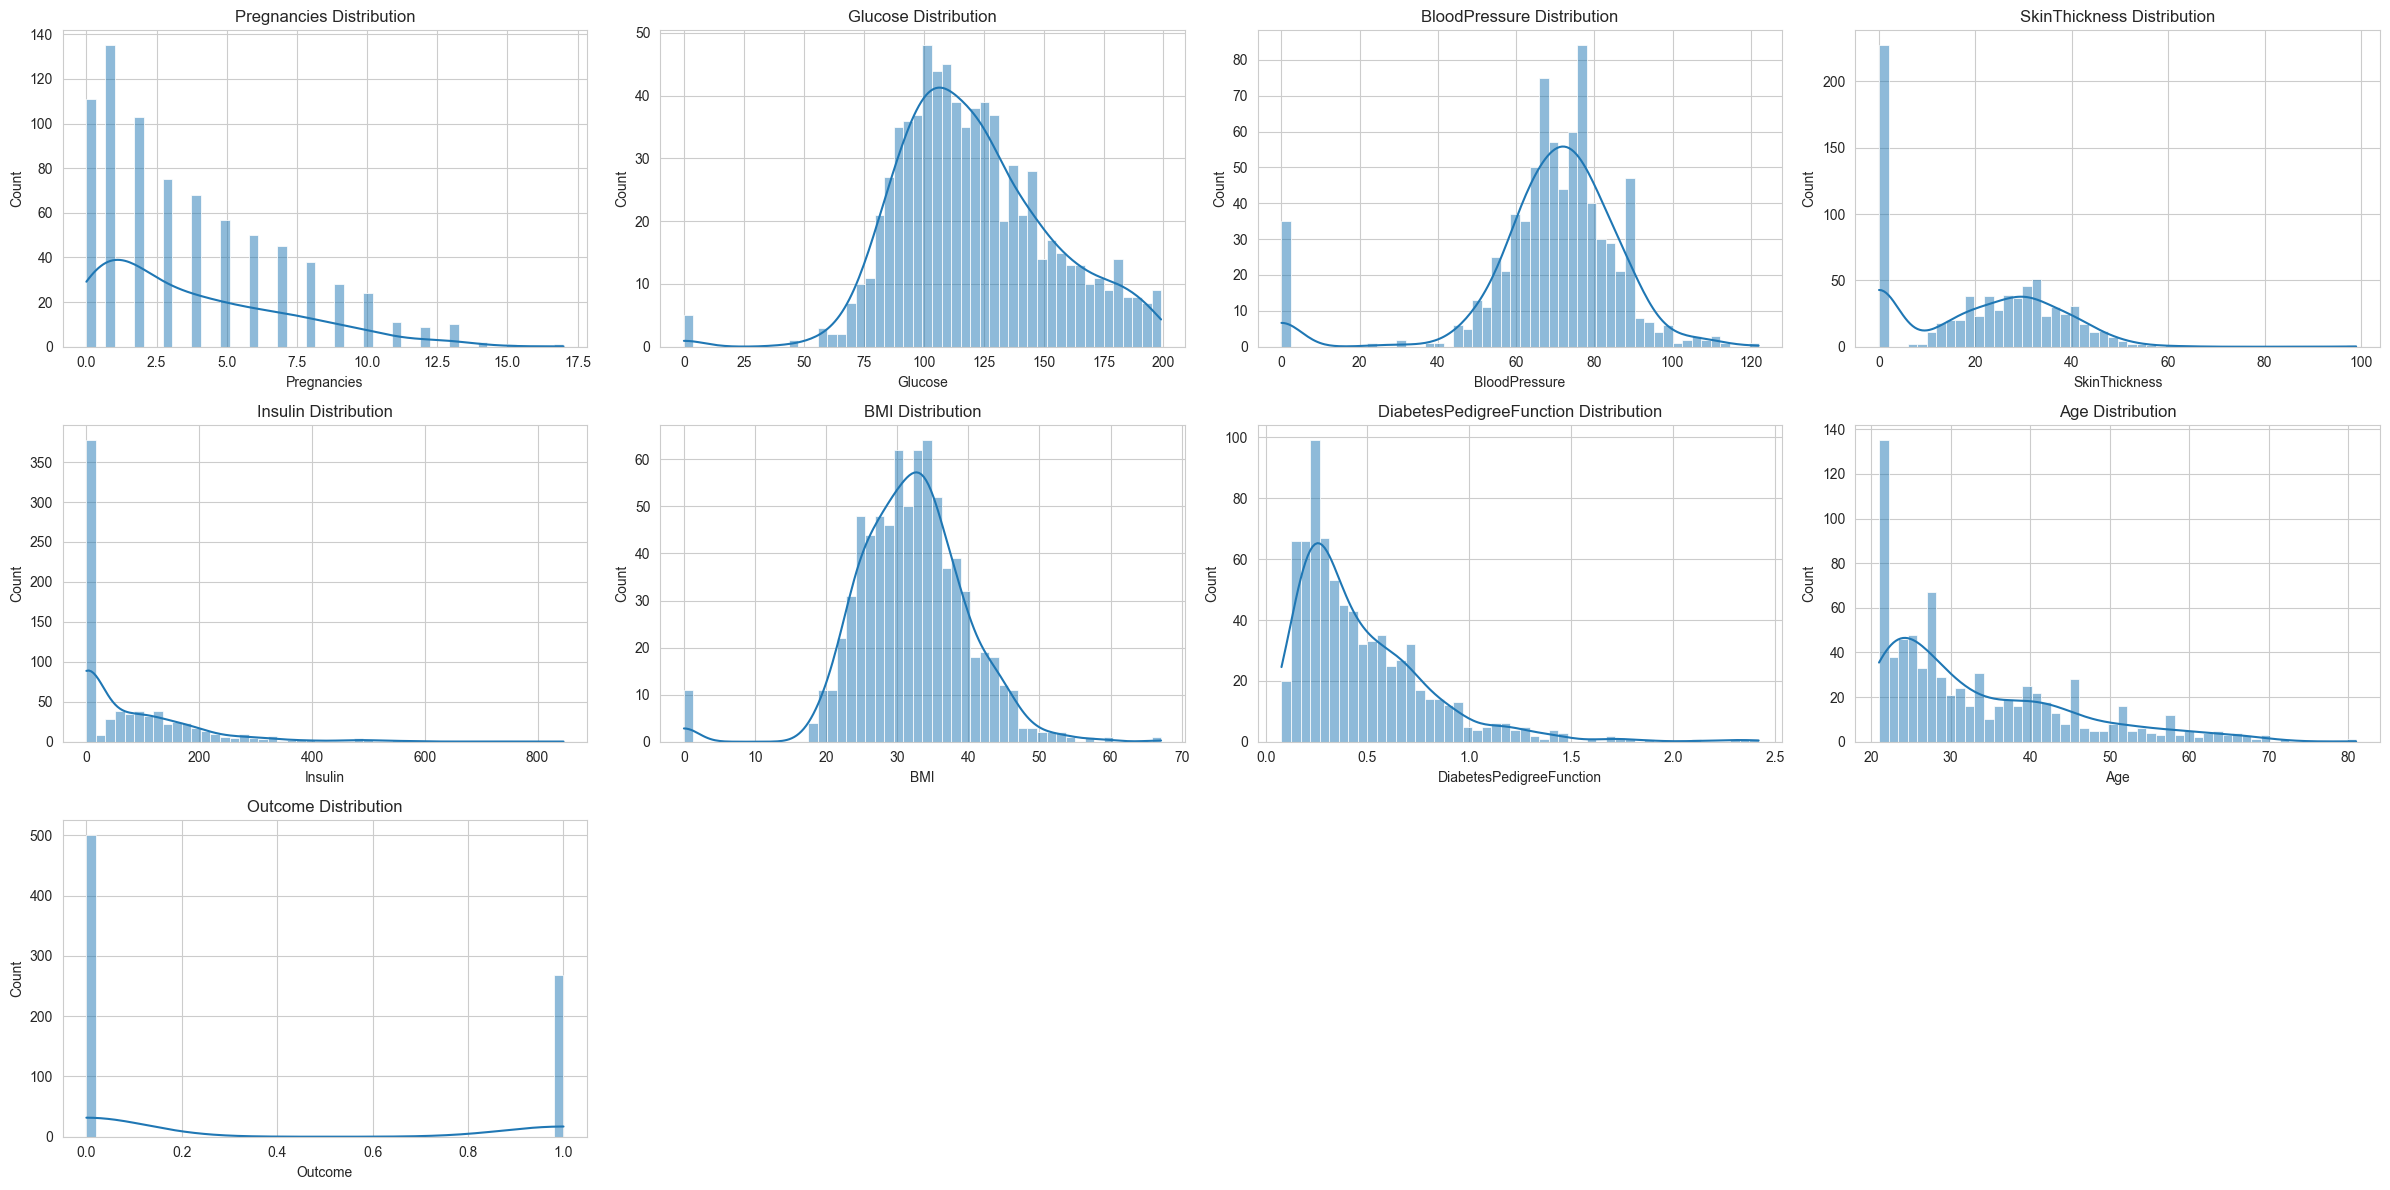

In [265]:
from src.visualization.plots import plot_multiple_features
plot_multiple_features(df=diabetes_data, bins=50, n_cols=4)

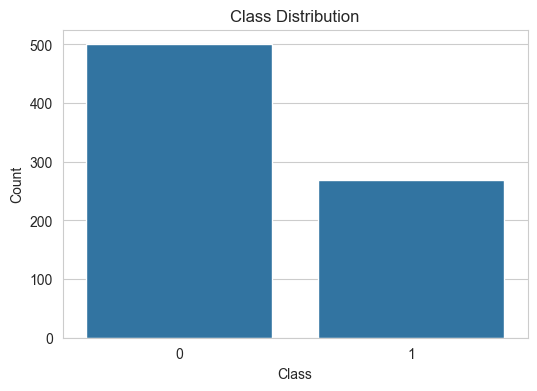

In [266]:
from src.visualization.plots import plot_class_distribution
plot_class_distribution(diabetes_data, 'Outcome')

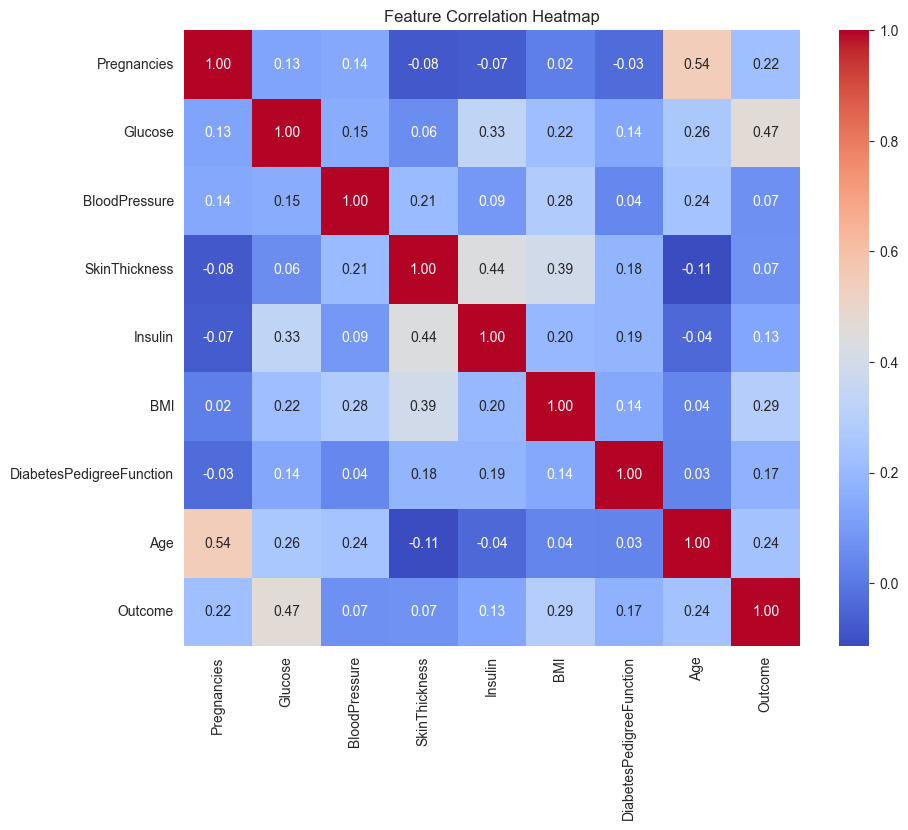

In [267]:
from src.visualization.plots import plot_correlation_heatmap

plot_correlation_heatmap(diabetes_data)

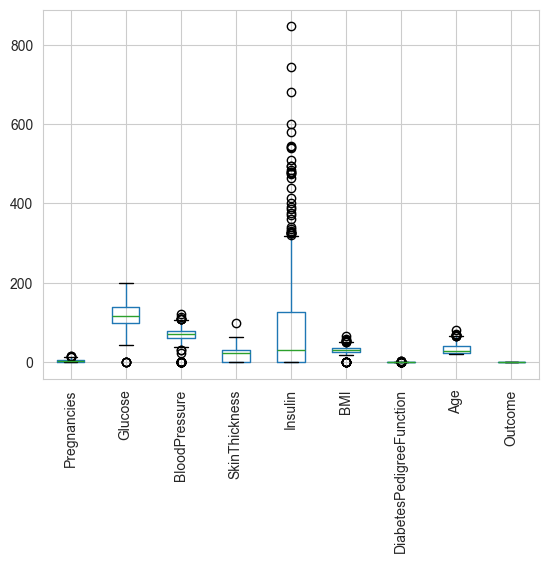

In [268]:
# box plot
diabetes_data.boxplot()
plt.xticks(rotation=90)
plt.show()

In [269]:
from src.utils.main import corelation_data
corelation_data(diabetes_data, 'Outcome', method='pearson')

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

### Cleaning the Dataset


In [270]:
data_enhance = diabetes_data.copy()

(data_enhance == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [271]:
# As we know that some features that can't be zero like
# "Glucose",
# "BloodPressure",
# "SkinThickness",
# "Insulin",
# "BMI"
cols_zero_invalid = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI"
]

data_enhance[cols_zero_invalid] = (
    data_enhance[cols_zero_invalid].replace(0, np.nan)
)

In [272]:
data_enhance.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [273]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data_enhance)
data_enhance = imputer.transform(data_enhance)
data_enhance = pd.DataFrame(data_enhance, columns=diabetes_data.columns)
data_enhance.shape

(768, 9)

### Feature Engineering

In [274]:
data_enhance['BMI_Age'] = data_enhance['BMI'] * data_enhance['Age']
data_enhance['Glucose_BMI'] = data_enhance['Glucose'] * data_enhance['BMI']
data_enhance['Glucose_Insulin'] = data_enhance['Glucose'] * data_enhance['Insulin']

# Create polynomial features
data_enhance['BMI_squared'] = data_enhance['BMI'] ** 2
data_enhance['Glucose_squared'] = data_enhance['Glucose'] ** 2



In [275]:
from src.utils.main import corelation_data
corelation_data(data_enhance, 'Outcome', method='pearson')

Outcome                     1.000000
Glucose_BMI                 0.520068
Glucose                     0.492928
Glucose_squared             0.491072
BMI_Age                     0.362938
BMI                         0.311924
Glucose_Insulin             0.307637
BMI_squared                 0.296906
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

## Split the data

In [286]:
X = data_enhance.drop(["Outcome"], axis=1)
y = data_enhance["Outcome"]
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'BMI_Age', 'Glucose_BMI',
       'Glucose_Insulin', 'BMI_squared', 'Glucose_squared'],
      dtype='object')

In [277]:
X.shape, y.shape

((768, 13), (768,))

In [278]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [279]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

xgb_pipeline = Pipeline([
    ('log_transformed', FunctionTransformer(np.log1p, inverse_func=np.expm1)),
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(random_state=42))
])

xgb_pipeline.fit(X_train, y_train)

y_pred_xgb = xgb_pipeline.predict(X_test)

print(f"\nXGBoost Test Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost Test Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost Test Recall: {recall_score(y_test, y_pred_xgb):.4f}")


XGBoost Test Accuracy: 0.7792
XGBoost Test Precision: 0.7083
XGBoost Test Recall: 0.6296


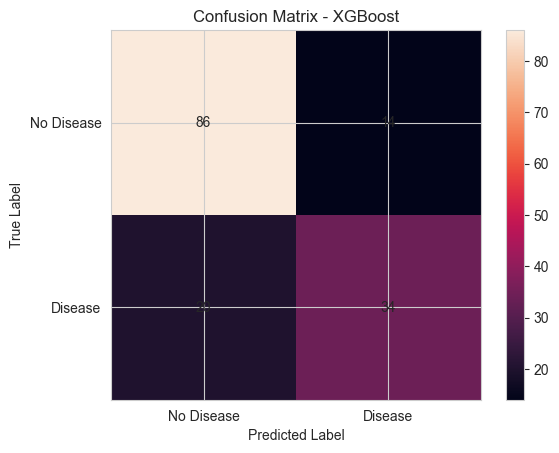

In [281]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - XGBoost")
plt.colorbar()

classes = ['No Disease', 'Disease']
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


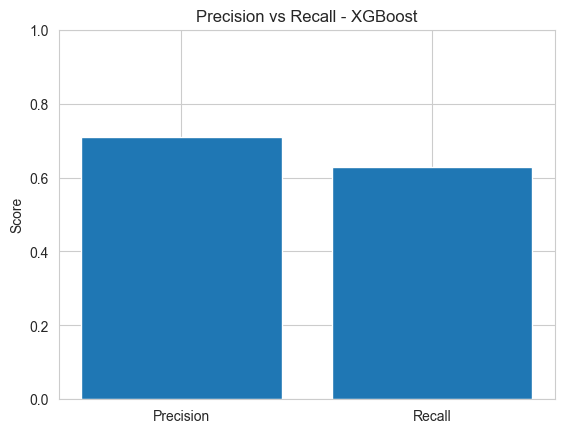

In [282]:
metrics = ['Precision', 'Recall']
values = [0.7083, 0.6296]

plt.figure()
plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title("Precision vs Recall - XGBoost")
plt.ylabel("Score")
plt.show()


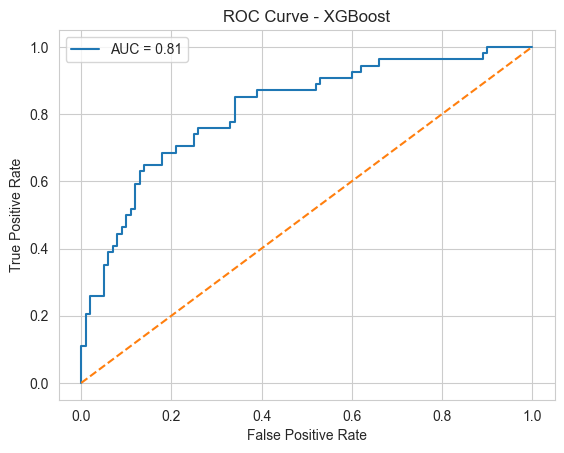

In [284]:
from sklearn.metrics import roc_curve, auc

y_prob = xgb_pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


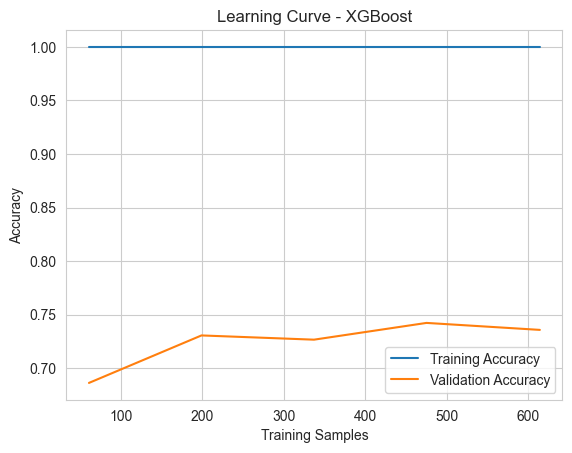

In [285]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    xgb_pipeline, X, y, cv=5, scoring='accuracy'
)

plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Accuracy")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation Accuracy")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.title("Learning Curve - XGBoost")
plt.legend()
plt.show()


In [296]:
import pandas as pd
import numpy as np

# Raw input (single patient)
data = {
    "Pregnancies": 3,
    "Glucose": 18,
    "BloodPressure": 2,
    "SkinThickness": 35,
    "Insulin": 30,
    "BMI": 33.6,
    "DiabetesPedigreeFunction": 0.62,
    "Age": 12
}

df = pd.DataFrame([data])

# Feature engineering (same as training)
df["BMI_Age"] = df["BMI"] * df["Age"]
df["Glucose_BMI"] = df["Glucose"] * df["BMI"]
df["Glucose_Insulin"] = df["Glucose"] * df["Insulin"]
df["BMI_squared"] = df["BMI"] ** 2
df["Glucose_squared"] = df["Glucose"] ** 2

# Reorder columns exactly like training
df = df[
    ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
     'BMI', 'DiabetesPedigreeFunction', 'Age',
     'BMI_Age', 'Glucose_BMI', 'Glucose_Insulin',
     'BMI_squared', 'Glucose_squared']
]

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,BMI_Age,Glucose_BMI,Glucose_Insulin,BMI_squared,Glucose_squared
0,3,18,2,35,30,33.6,0.62,12,403.2,604.8,540,1128.96,324


In [297]:
# Predict probability
probability = xgb_pipeline.predict_proba(df)[0][1]

# Predict class (default threshold = 0.5)
prediction = xgb_pipeline.predict(df)[0]

print("Diabetes Probability:", round(probability, 3))
print("Prediction:", "Diabetic" if prediction == 1 else "Non-Diabetic")

Diabetes Probability: 0.013
Prediction: Non-Diabetic
